In [1]:
import pandas as pd
import numpy as np

from seaborn import histplot, boxplot, countplot, heatmap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score

from matplotlib.pyplot import show, plot, scatter

from math import exp, log

from pickle import dump

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,201.000,30,0
6,3,78,50,32,88,31.0,248.000,26,1
7,10,115,0,0,0,35.3,134.000,29,0
8,2,197,70,45,543,30.5,158.000,53,1
9,8,125,96,0,0,0.0,232.000,54,1


Nuestro set de datos cuenta con **8 variables descriptoras** (`Pregnancies, Glucose, BloodPressure, SkinkThickness, Insulin, BMI, DiabetesPedigreeFunction, Age`).

Y **1 variable de salida** `Outcome` que corresponde al padecimiento de la diabetes para el paciente analizado y por tanto, la **variable que va a predecir nuestro modelo de clasificación**. 

En este caso, todas las variables son numéricas. Siendo `BMI` y `DiabetesPedigreeFunction` números reales (`float64`) y el resto siendo enteros (`int64`).

También se observa que no hay ningún valor **nulo** lo que no quiere decir que pueda haber **valores atípicos** en la forma de un **0**.

En mi caso, voy a emplear **todas las variables predictoras** para conformar el modelo.

Veamos ahora las métricas estadísticas básicas de las variables predictoras del modelo.

In [4]:
df.drop(labels='Outcome', axis=1).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000


Del informe estadístico que expide el método `describe()` de `pandas` podemos ver que las variables `Glucose`, `BloodPressure`, `Insuline` y `BMI` contienen **valores atípicos** en la forma de un **0**. Para poder tratar este tipo de datos, podemos utilizar algún método de imputación. Para las variables que contienen valores reales, voy a utilizar la **imputación a la media**, y para el resto, **imputación a la mediana**. 

*La razón por la cual se obvian los valores de 0 para los embarazos es puesto que puede haber 0 embarazos perfectamente*

Pero antes de proceder con la imputación de datos, vamos a visualizar las gráficas con los datos crudos de nuestro data set.


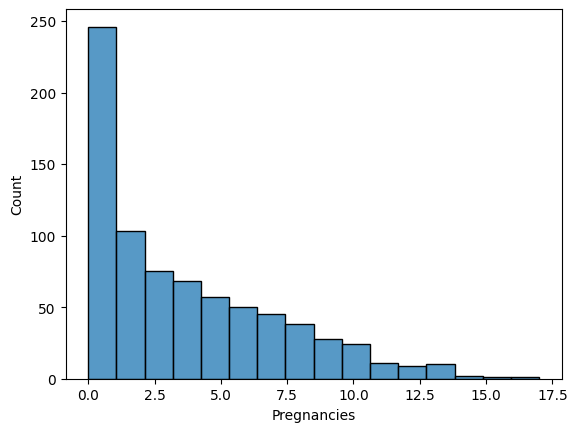

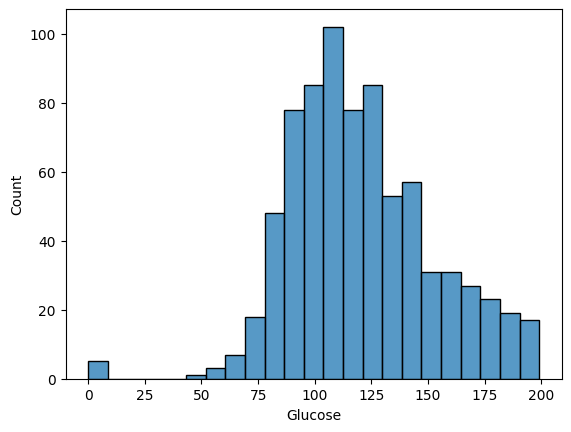

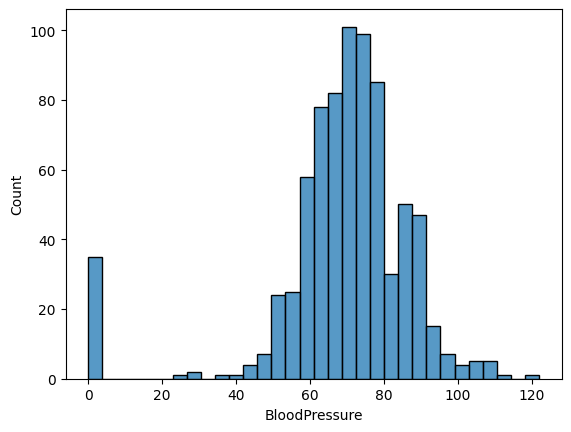

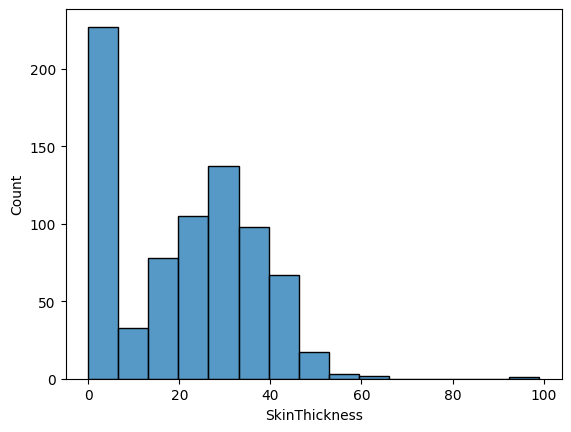

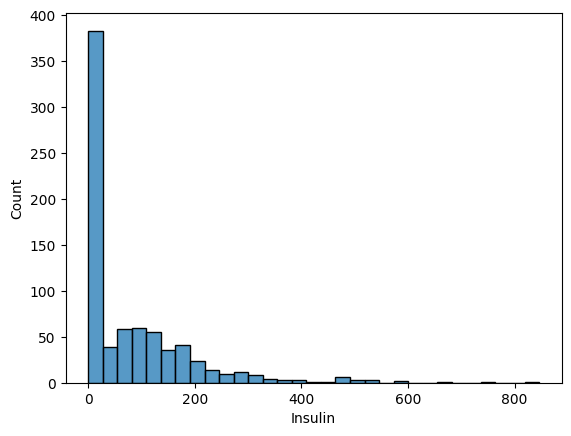

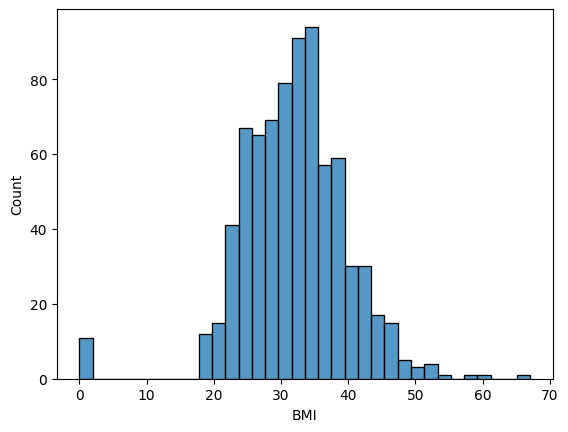

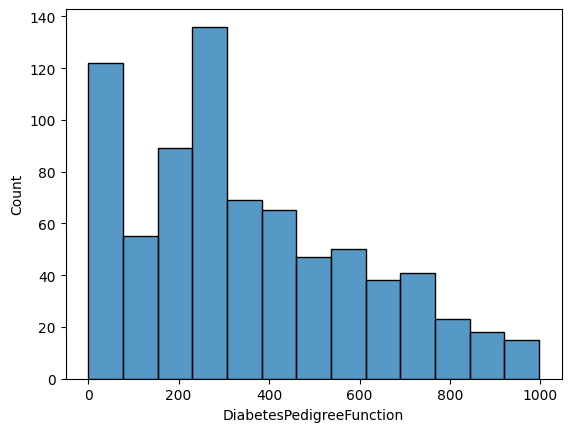

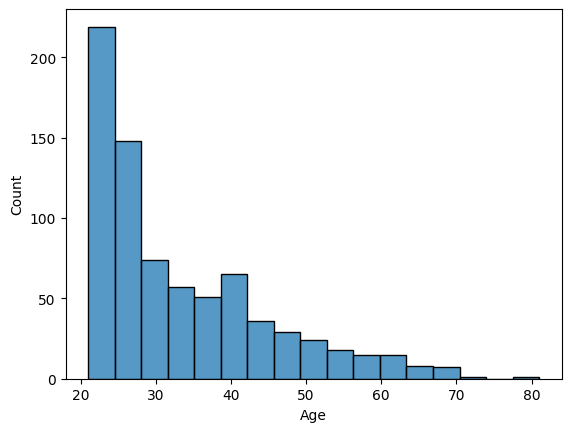

In [5]:
for col in df:
    if col == 'Outcome':
        continue
    histplot(df[col])
    show()

Por lo general, se observa en todos los casos en los que el **0** resulta un **valor atípico** que hay una gran concentración de registros que tienen un valor **0** para esa característica en particular.

In [6]:
mean_vars = ['BMI', 'DiabetesPedigreeFunction']
med_vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

for col in mean_vars:
    df[col] = df[col].replace({0: df[col].mean()})

for col in med_vars:
    df[col] = df[col].replace({0: df[col].median()})

Comprobamos a través del describe que ya no haya 0 en las columnas imputadas. 

In [7]:
df.drop(labels='Outcome', axis=1).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450805,347.079349,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875374,254.431659,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.100000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,165.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,295.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000


Como se puede observar, los valores mínimos de las columnas imputadas, es diferente de 0. Por tanto, la imputación de valores se ha realizado correctamente. 

Una vez imputados los ceros la distribución de los datos para las variables descriptoras resulta: 

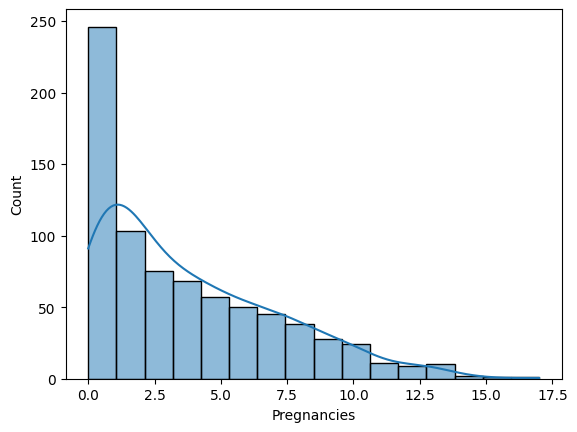

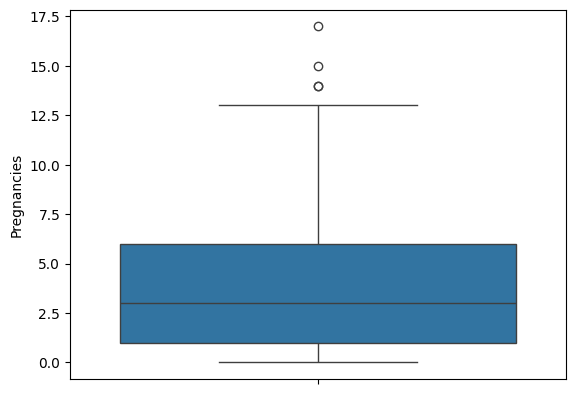

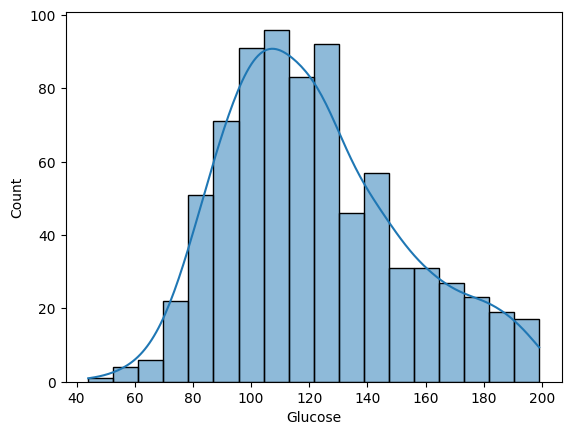

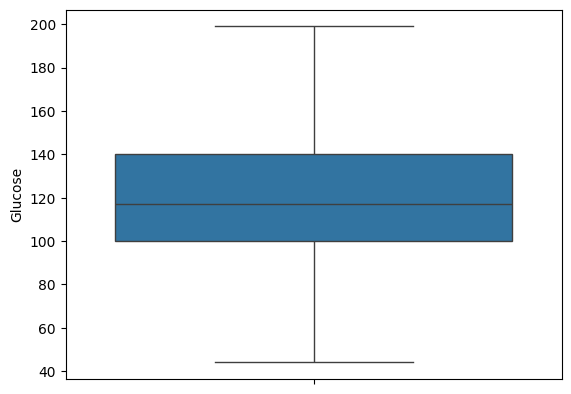

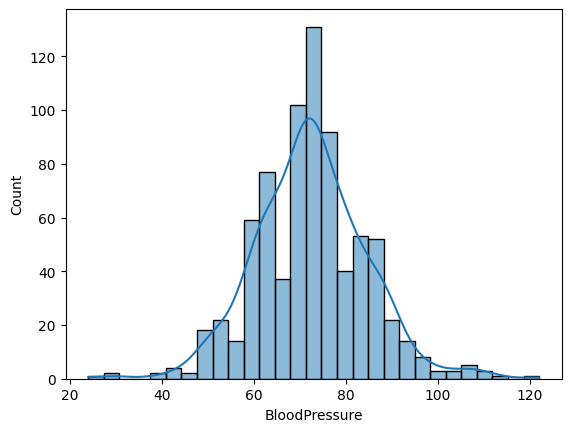

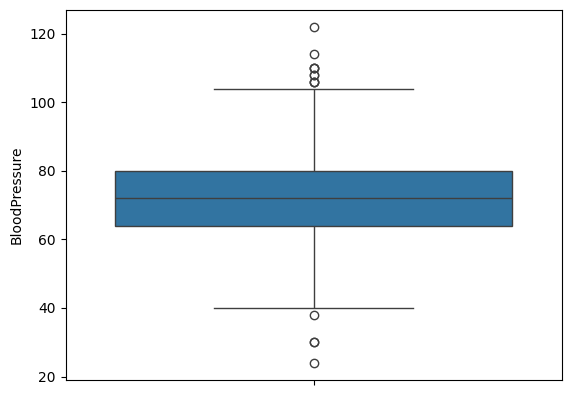

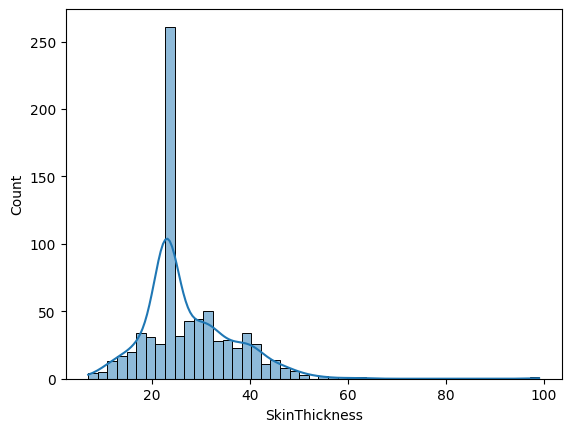

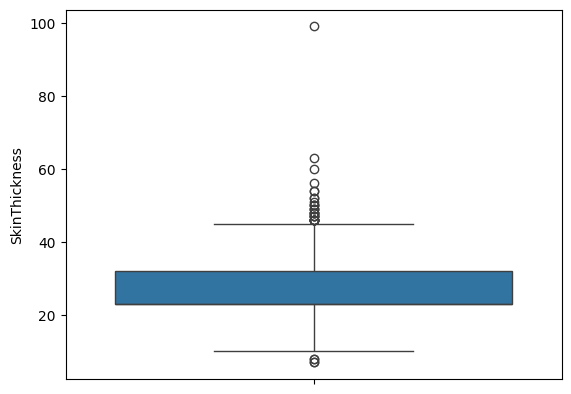

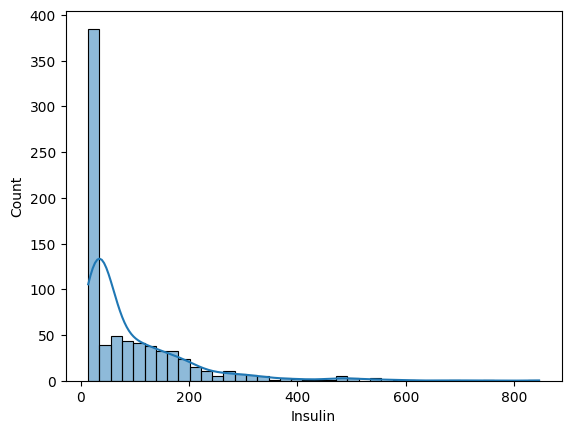

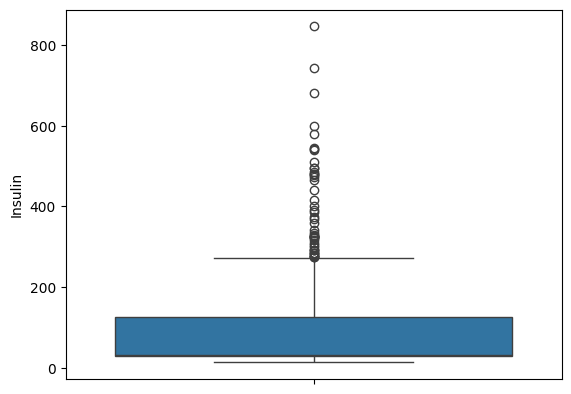

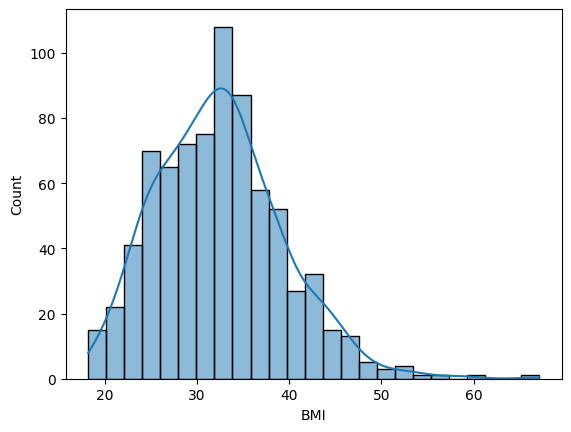

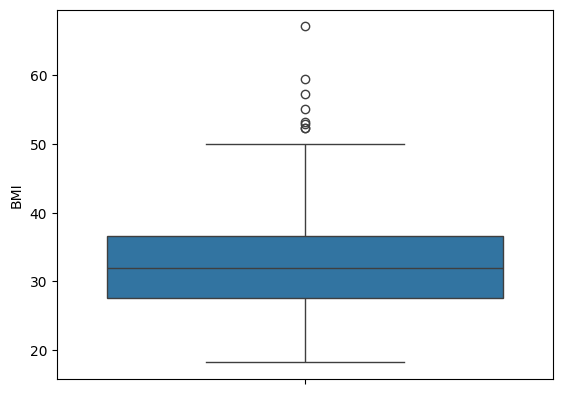

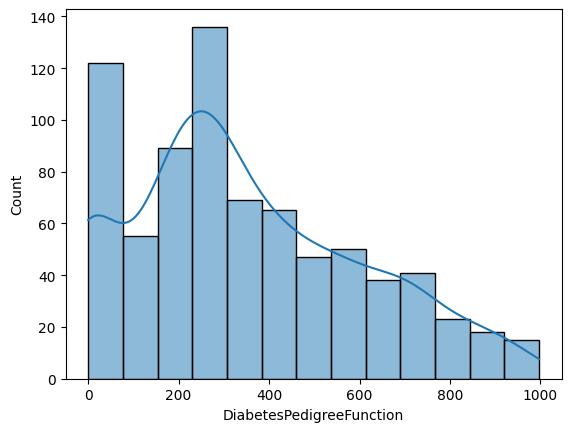

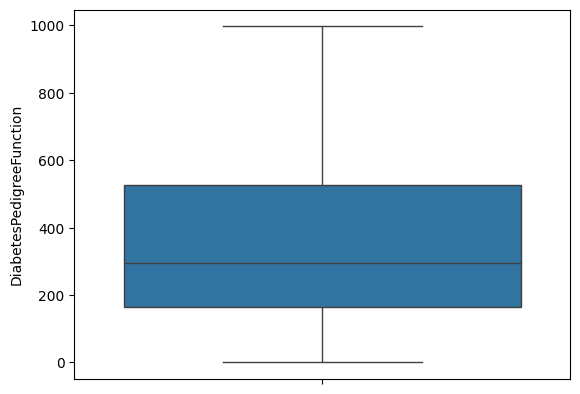

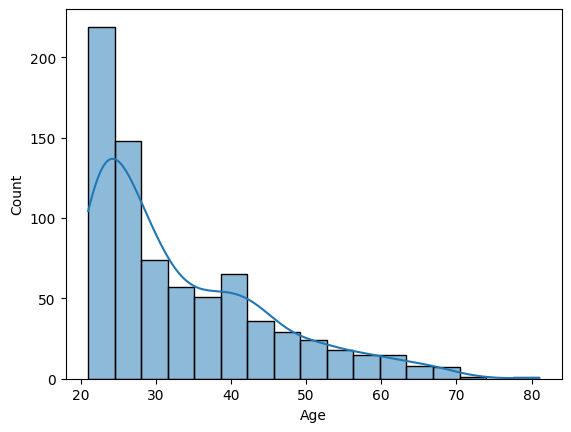

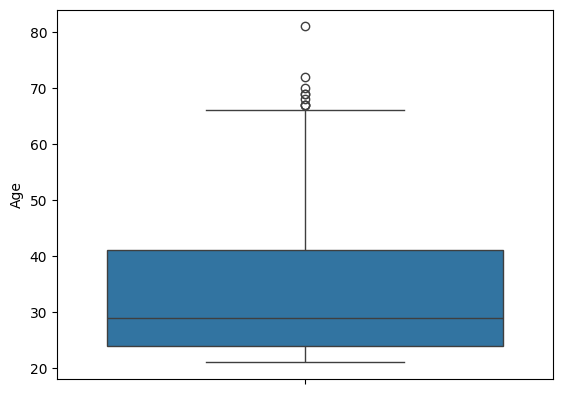

In [8]:
for col in df:
    if col == 'Outcome':
        continue
    histplot(df[col], kde=True)
    show()
    boxplot(df[col])
    show()

In [9]:
# Valores de las medias
df.drop(labels='Outcome', axis=1).mean()

Pregnancies                   3.845052
Glucose                     121.656250
BloodPressure                72.386719
SkinThickness                27.334635
Insulin                      94.652344
BMI                          32.450805
DiabetesPedigreeFunction    347.079349
Age                          33.240885
dtype: float64

Veamos qué sucede para cada una de las variables predictoras:
- **Pregnancies**:
    - La distribución presenta un sesgo positivo. La media se encuentra concentrada hacia el límite inferior de los datos. 
    - Presenta algunos valores alrededor del límite superior, como se puede observar tanto en el histograma como en el diagrama de caja y bigote. 

- **Glucose**:
    - Presenta una distribución similar al a normal o gaussiana con un ligero sesgo positivo, puesto que la media está centralizada ligeramente hacia la izquierda del histograma y mientras que se presencia un descenso gradual a la izquierda, lo mismo no pasa en la derecha.
    - No se perciben outliers como se puede apreciar en el diagrama de caja y bigote. Además, de la concentración de los datos alrededor de la media se deduce que no hay presencia de outliers.

- **BloodPressure**:
    - Presenta una distribución normal, la media se encuentra centralizada y hay un descenso más o menos gradual hacia ambos extremos. 
    - Se observan algunos outliers hacia ambos extremos a su vez. Esto se deduce claramente de la gráfica de distribución, que resulta más acentuada en el centro y en el diagrama de caja y bigote, que los marca. 

- **SkinThickness**:
    - Se observa un gran pico de registros hacia la izquierda (límite inferior), la media de los datos está concentrada ahí. La distribución del resto de registros es bastante irregular. 
    - Presenta una cantidad relativamente grande de outliers hacia la derecha (límite superior) y tiene hay al menos un outlier más prominente que los demás. 

- **Insulin**:
    - Presenta un efecto similar a la variable `SkinThickness`. La media está concetrada hacia valores muy cercanos a 0 y presenta un sesgo positivo muy marcado. 
    - Presenta una gran cantidad de outliers hacia el límite superior y en particular, se observa que hay al menos 2 o 3 outliers más prominentes que el resto.
    
- **BMI**:
    - Presenta una distribución ligeramente normal con sesgo positivo. La media está concentrada hacia la izquierda (límite inferior) 
    - Presenta algunos outliers alrededor del límite superior. 

- **DiabetesPedigreeFunction**:
    - Presenta sesgo positivo con dos concentraciones de registros prominentes. Aún así, la media se encuentra hacia la izquierda de la distribución.
    - No presenta outliers aparentes. 

- **Age**:
    - Presenta sesgo positivo con una media centralizada hacia la izquierda. La frecuencia de registros va más o menos descendienco gradualmente. 
    - Se observan outliers hacia la derecha (límite superior). Esto se puede deducir a través de los datos que se encuentran más hacia la derecha en la distribución y por los outliers marcados por el diagrama de caja y bigote. 

Debido a que las columnas `Insulin` y `SkinThickness` presentan una distribución de los datos y outliers bastante prominentes que desvirtuarían el modelo, voy a quitarlas del DataFrame. 

In [10]:
df.drop(labels=['Insulin', 'SkinThickness'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


Como último detalle a incluir del informe antes de comenzar con la separación de datos en test y train, vamos a analizar el balance de las clases de nuestro set de datos. Para ello, voy a utilizar un diagrama de barra.  

<Axes: xlabel='Outcome', ylabel='count'>

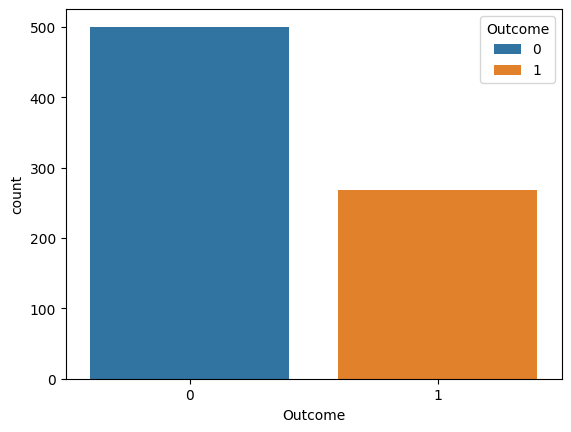

In [11]:
countplot(df, x='Outcome', hue='Outcome')

Claramente se aprecia que hay muchos **más registros para la clase de los pacientes que están sanos** que los que tienen diabetes.

Ahora que los datos han sido analizados y tratados, vamos a hacer la división de los datos en conjunto de datos train y conjunto de datos test.

In [12]:
X = df.drop(labels='Outcome', axis=1).to_numpy()
y = df['Outcome'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75291)

Almacenamos y declaramos una instancia de LogisticRegression para nuestro modelo

In [13]:
C = 0.1
model = LogisticRegression(solver='lbfgs', \
                           penalty='l2', \
                           C=C, \
                           class_weight='balanced', \
                           max_iter=1000000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = model.predict_proba(X_test)[:, 1]

intercept = model.intercept_[0]
coefficients = list(model.coef_.ravel())
print(f'Los coeficientes de la Regresión Logística son:')
print(f'intercepto (b_0): {intercept:.1f}')
print(f'coeficientes (b_1,...,b_6): {list(map(lambda x: round(x, 1), coefficients))}')

Los coeficientes de la Regresión Logística son:
intercepto (b_0): -7.6
coeficientes (b_1,...,b_6): [0.1, 0.0, -0.0, 0.1, 0.0, 0.0]


Como se puede observar, al redondear a un decimal, la mayoría de coeficientes de la regresión se quedan en **0**. Esto se debe principalmente a la **penalización** aplicada, que reduce los coeficientes de la regresión lineal para quitar aquellos que **no aportan** mucho a la predicción. Por tanto, a la hora de realizar la predicción su valor no va a influir mucho en el resultado final.

Por tanto, teniendo en cuenta los coeficientes que no dan 0, la ecuación de la regresión logística quedaría:
$$
y = \frac{1}{1 + e^{-(-7.6 + 0.1x_1 + 0.1x_4)}}
$$

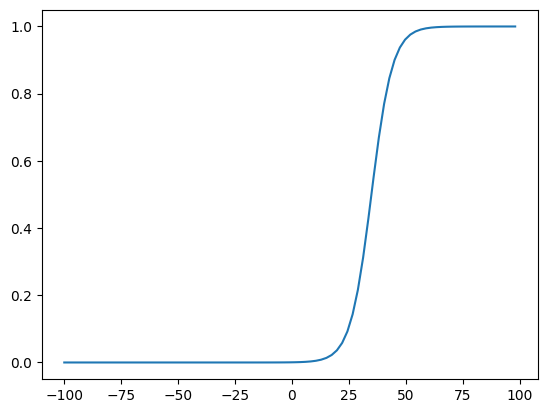

In [14]:
x = np.arange(-100, 100, log(10))
func = np.frompyfunc(lambda b0, b1, b2, b3, b4, b5, b6, x: 1 / (1 + exp(-(b0 + b1*x + b2*x + b3*x + b4*x + b5*x + b6*x))), 8, 1)
points = func(intercept, *coefficients, x)
plot(x, points)

La función logística apenas se aprecia por el valor que adoptan los coeficientes

<Axes: >

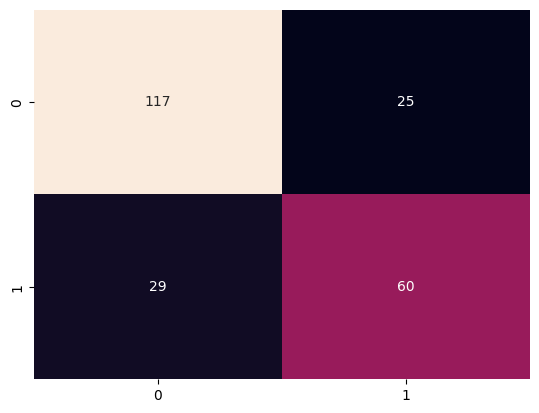

In [15]:
c_matrix = confusion_matrix(y_pred, y_test)
heatmap(c_matrix, annot=True, cbar=False, fmt='.0f')

De la matriz de confusión se puede observar que se ha conseguido un buen **balance** entre los **falsos negativos** (*FN*) y los **falsos positivos** (*FP*) que predice el modelo. Además, cuenta con unos valores bastante altos de aciertos para **verdaderos negativos** (*TN*) y **verdaderos positivos** (*TP*). 

In [16]:
fr, sr = c_matrix
tn, fp = fr
fn, tp = sr

print(f'TP: {tp}\nTN: {tn}\nFP: {fp}\nFN: {fn}')

TP: 60
TN: 117
FP: 25
FN: 29


Ahora, computamos las métricas de evaluación más comunes para nuestro modelo, utilizando el conjunto de los datos test para la variable objetivo `Outcome` y las probabilidades o *scores* calculadas anteriormente.

In [17]:
precision = precision_score(y_pred, y_test, pos_label=1)
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test, pos_label=1)
f1score = f1_score(y_pred, y_test, pos_label=1)

print(f'El valor de la precisión del modelo es de: {precision:.2f}')
print(f'El valor de la exactitud del modelo es de: {accuracy:.2f}')
print(f'El valor de la sensbilidad del modelo es de: {recall:.2f}')
print(f'El valor de la puntuación f1 del modelo es de: {f1score:.2f}')

El valor de la precisión del modelo es de: 0.71
El valor de la exactitud del modelo es de: 0.77
El valor de la sensbilidad del modelo es de: 0.67
El valor de la puntuación f1 del modelo es de: 0.69


Tras haber probado con varios valores para el `random_state` he llegado a la siguiente configuración más o menos homogénea.

A partir de los resultados de las métricas se observa que:
- El modelo presenta una alta fracción de positivos (**precision**) y por lo tanto predice de forma **bastante precisa** los **valores positivos**.

- También tiene una **exactitud** bastante alta, lo que quiere decir que acierta las predicciones del modelo son acertadas en una buena parte de los casos (*~77%*). 

- A través del valor de la **sensbilidad** podemos ver que el modelo es **bastante decente** a la hora de evitar **falsos negativos** (*está más o menos cecano a 1, lo que indica que los FN son relativamente bajos. Esto también se ve en la matriz de confusión*). 

- Y finalmente la puntuación f1 nos resume el **rendimiento del modelo general**, pues el valor obtenido es representativo del **balance** entre los aciertos que ha tenido el modelo y sus falsos negativos y positivos. 

Ahora, para tener una métrica más visual sobre el rendimiento del modelo, vamos a trazar la curva ROC y calcular el AUC correspondiente.

El valor del AUC-ROC es de: 0.87


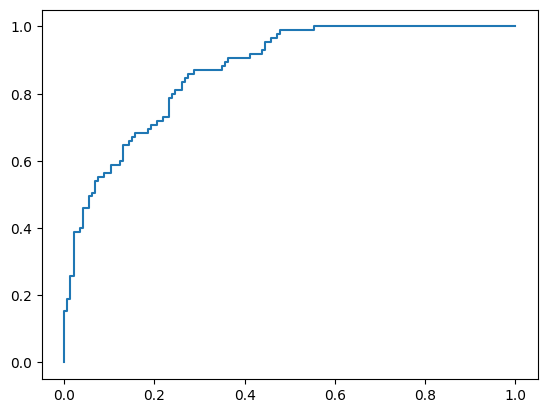

In [18]:
fpr, tpr, _ = roc_curve(y_test, scores)
plot(fpr, tpr)

auc = roc_auc_score(y_test, scores)
print(f'El valor del AUC-ROC es de: {auc:.2f}')

Como se puede observar, el valor obtenido para el área debajo de la curva es muy cercano a 1 (**0.87**) lo que indica que el clasificador es **muy bueno**.

Comprobamos que el modelo realiza una predicción correcta para un registro de la clase positiva y un registro para la clase negativa de nuestro dataset

In [19]:
ill_registry = np.array([6,148,72,33.6,627,50]).reshape(1, -1)
healthy_registry = np.array([1,97,15,23.2,487,22]).reshape(1, -1)

prediction_ill = model.predict(ill_registry)
prediction_healthy = model.predict(healthy_registry)

print(f'Para el registro de la clase positiva (paciente diabético) el modelo predice: {"diabético" if prediction_ill else "sano"}')
print(f'Para el registro de la clase negativo (paciente sano) el modelo predice: {"diabético" if prediction_healthy else "sano"}')

Para el registro de la clase positiva (paciente diabético) el modelo predice: diabético
Para el registro de la clase negativo (paciente sano) el modelo predice: sano


Finalmente, para poder hacer la web que va a dar juego a realizar predicciones con el modelo, serializamos nuestro modelo entrenado con la librería `pickle`.

In [20]:
dump(model, open('model_reglog.pkl', 'wb'))